In [54]:
# =========================================================
# MACHINE FAILURE 
# Dataset columns : UDI, Type, Air temperature etc
# Target column : "Failure" 
# =========================================================
 
# =========================
# 1) Imports
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
 

In [ ]:
# =========================
# 2) Load Data
# =========================
data = pd.read_csv("machine_failure_data.csv")
 
print("Shape:", data.shape)
print("\nColumns:\n", list(data.columns))
data.head()
data.info()

Shape: (10000, 8)

Columns:
 ['UDI', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Failure']
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  str    
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), str(1)
memory usage: 625.1 KB


: 

In [ ]:
# 
# 3) Data Cleaning
# 
 
# 3.1 Drop ID-like column (UDI is an identifier; not useful for prediction)
if "UDI" in data.columns:
    data = data.drop(columns=["UDI"])
 
# 3.2 Remove duplicates
print("\nDuplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()
 
# 3.3 Missing values check
print("\nMissing values per column:\n", data.isnull().sum())
 
# Fill missing values (median for numeric, mode for categorical) — simple class-level handling
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include="object").columns
 
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())
 
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])
 
# 3.4 Final check after cleaning
print("\nAfter cleaning - Shape:", data.shape)
data.info()
 


Duplicate rows: 0

Missing values per column:
 Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

After cleaning - Shape: (10000, 7)
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  str    
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Failure              10000 non-null  int64  
dtypes: float64(3), int64(3), str(1)
memory usage: 547.0 KB


C:\Users\nares\AppData\Local\Temp\ipykernel_27000\356739558.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = data.select_dtypes(include="object").columns


: 

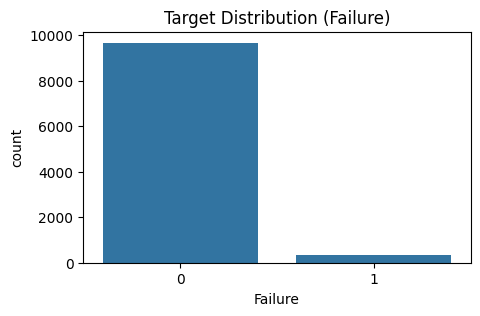


Target counts:
 Failure
0    9661
1     339
Name: count, dtype: int64


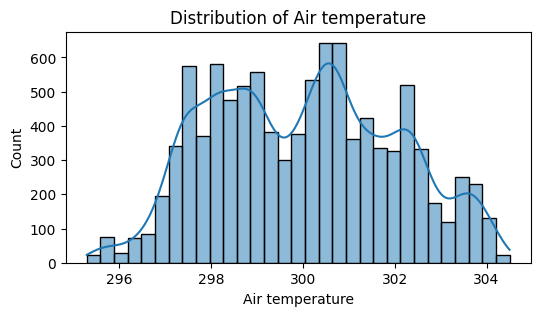

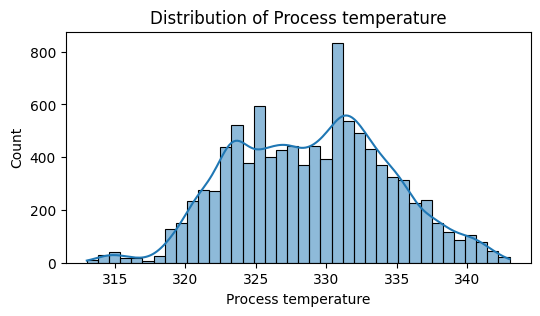

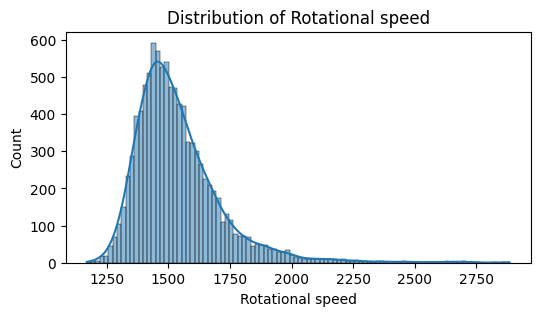

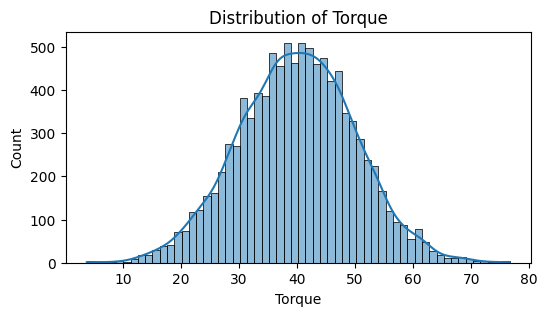

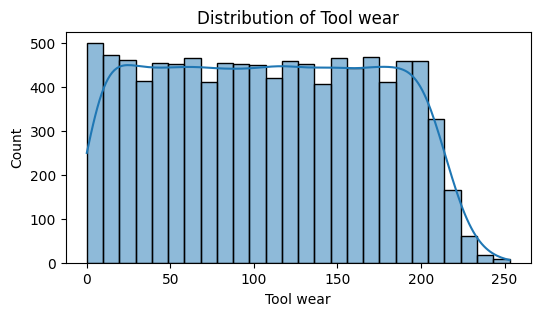

C:\Users\nares\AppData\Local\Temp\ipykernel_27000\1262128947.py:25: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols_eda = [c for c in data.select_dtypes(include="object").columns if c != TARGET]


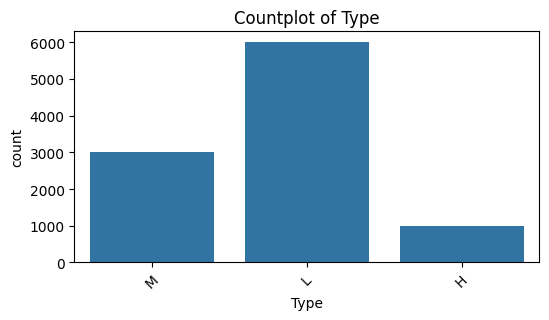

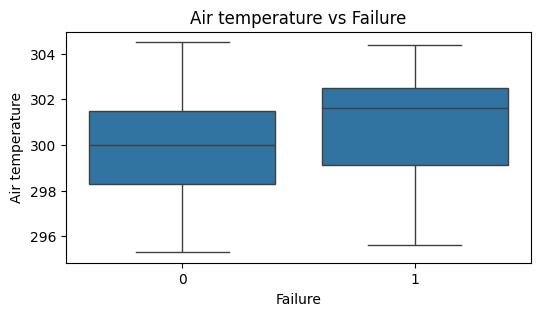

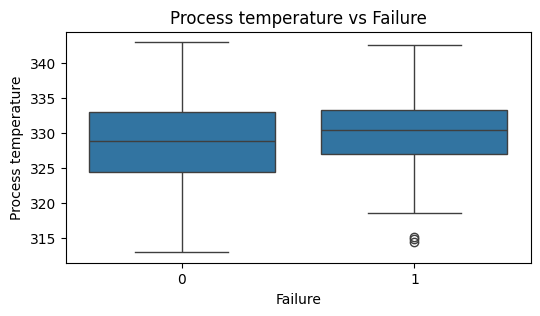

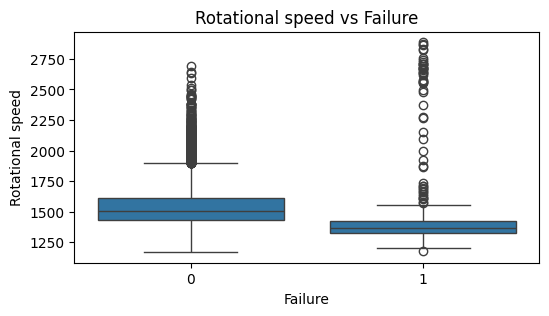

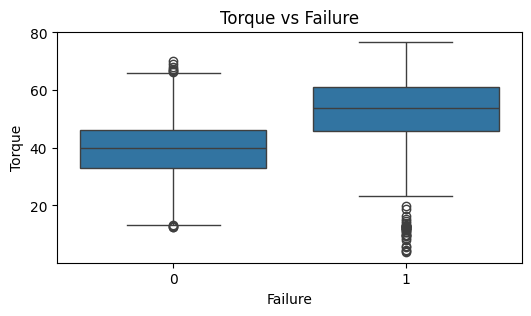

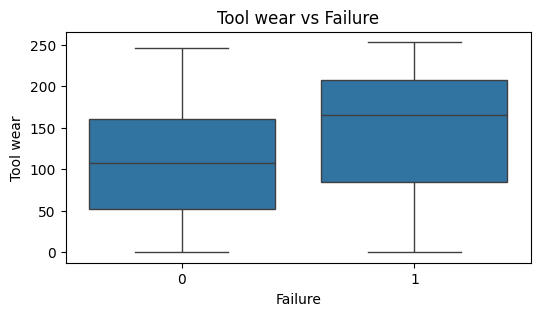

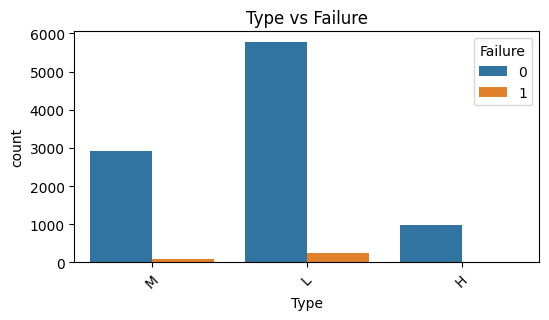

: 

In [ ]:
# 
# 4) EDA (Univariate + Bivariate + Correlation)
# 
 
TARGET = "Failure"  # correct target column name in your dataset
 
# ---- 4.1 Target Distribution (Univariate)
plt.figure(figsize=(5,3))
sns.countplot(x=TARGET, data=data)
plt.title("Target Distribution (Failure)")
plt.show()
 
print("\nTarget counts:\n", data[TARGET].value_counts())
 
# ---- 4.2 Univariate: Numerical Distributions
num_cols_eda = [c for c in data.select_dtypes(include=np.number).columns if c != TARGET]
 
for col in num_cols_eda:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
 
# ---- 4.3 Univariate: Categorical Counts
cat_cols_eda = [c for c in data.select_dtypes(include="object").columns if c != TARGET]
 
for col in cat_cols_eda:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=data)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()
 
# ---- 4.4 Bivariate: Numerical vs Target (boxplots)
for col in num_cols_eda:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=TARGET, y=col, data=data)
    plt.title(f"{col} vs {TARGET}")
    plt.show()
 
# ---- 4.5 Bivariate: Categorical vs Target
for col in cat_cols_eda:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue=TARGET, data=data)
    plt.title(f"{col} vs {TARGET}")
    plt.xticks(rotation=45)
    plt.show()
 


<Figure size 600x400 with 0 Axes>

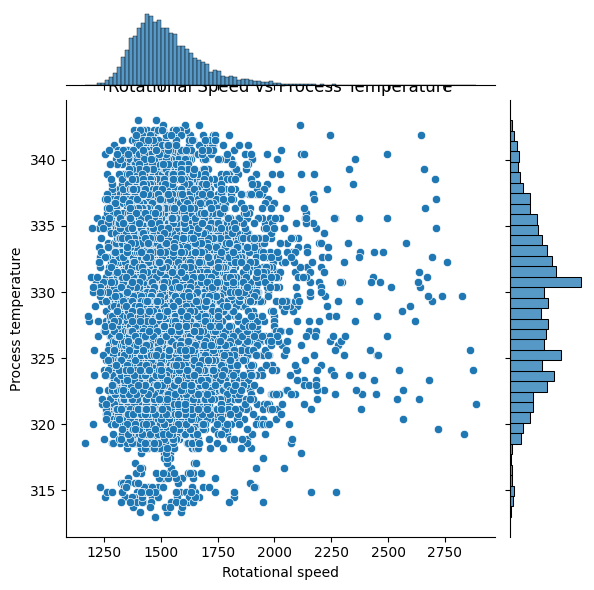

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.jointplot(x="Rotational speed", y="Process temperature", data=data)
plt.title("Rotational Speed vs Process Temperature")
plt.show()



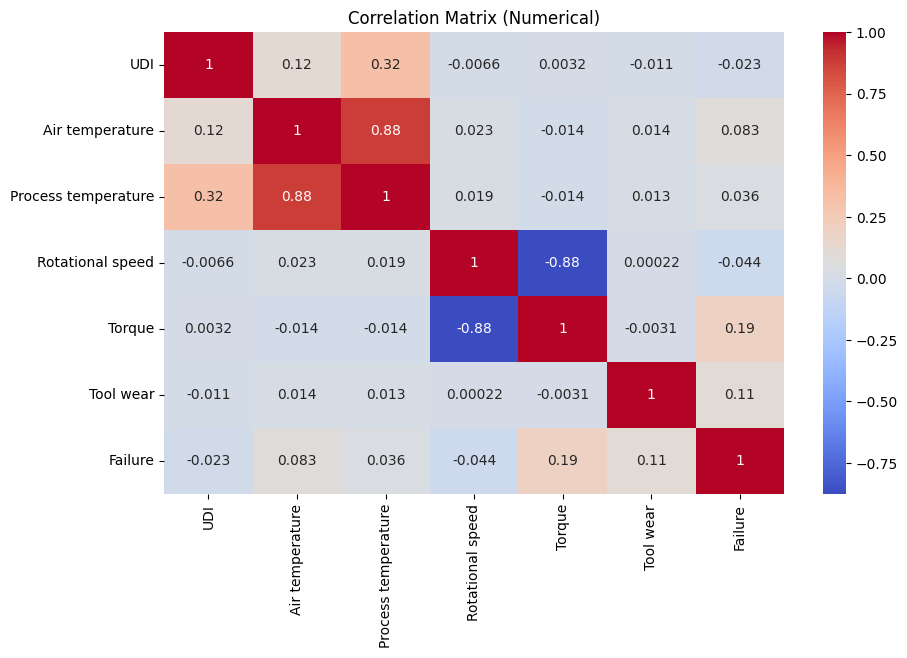

In [55]:
# ----Correlation (Numerical) -- Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical)")
plt.show()

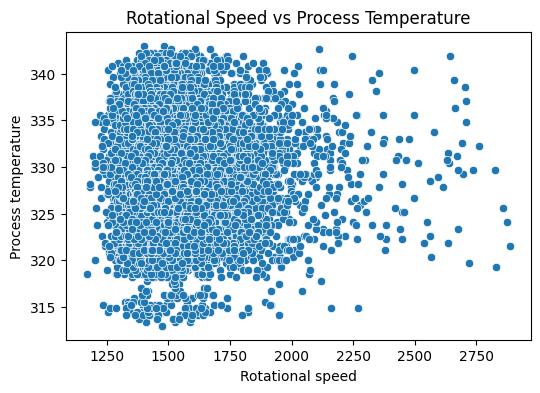

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x="Rotational speed", y="Process temperature", data=data)
plt.title("Rotational Speed vs Process Temperature")
plt.show()


In [58]:
# 
# Preprocessing for Modeling
# 
 
X = data.drop(TARGET, axis=1)
y = data[TARGET]
 
# One-hot encoding for categorical columns (Type)
X = pd.get_dummies(X, drop_first=True)

In [59]:
# 
# Train / Valid / Test Split (60/20/20)
# 
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
 
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
 
print("\nSplit shapes:")
print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)


Split shapes:
Train: (6000, 8) Valid: (2000, 8) Test: (2000, 8)


In [60]:
# 
# Scaling
# 
scaler = StandardScaler()
 
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc  = scaler.transform(X_test)

In [61]:
# 
# Baseline Model (Logistic Regression)
# 
model = LogisticRegression(max_iter=1000)
model.fit(X_train_sc, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [62]:
# 
# Train Metrics
# 
 
y_train_pred = model.predict(X_train_sc)
 
print("\nTRAIN METRICS")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, zero_division=0))
print("Recall   :", recall_score(y_train, y_train_pred, zero_division=0))
print("F1 Score :", f1_score(y_train, y_train_pred, zero_division=0))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred, zero_division=0))


TRAIN METRICS
Accuracy : 0.971
Precision: 0.7543859649122807
Recall   : 0.21182266009852216
F1 Score : 0.33076923076923076

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5797
           1       0.75      0.21      0.33       203

    accuracy                           0.97      6000
   macro avg       0.86      0.60      0.66      6000
weighted avg       0.97      0.97      0.96      6000



In [63]:
# 
# Validation Metrics
# 
y_valid_pred = model.predict(X_valid_sc)
 
print("\nValidation Metrics")
print("Accuracy :", accuracy_score(y_valid, y_valid_pred))
print("Precision:", precision_score(y_valid, y_valid_pred, zero_division=0))
print("Recall   :", recall_score(y_valid, y_valid_pred, zero_division=0))
print("F1 Score :", f1_score(y_valid, y_valid_pred, zero_division=0))
print("\nClassification Report (Validation):\n")
print(classification_report(y_valid, y_valid_pred, zero_division=0))


Validation Metrics
Accuracy : 0.971
Precision: 0.7272727272727273
Recall   : 0.23529411764705882
F1 Score : 0.35555555555555557

Classification Report (Validation):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.73      0.24      0.36        68

    accuracy                           0.97      2000
   macro avg       0.85      0.62      0.67      2000
weighted avg       0.97      0.97      0.96      2000



In [64]:
# 
# Test Metrics
# 
y_test_pred = model.predict(X_test_sc)
 
print("\nTest Metrics")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1 Score :", f1_score(y_test, y_test_pred, zero_division=0))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred, zero_division=0))


Test Metrics
Accuracy : 0.966
Precision: 0.5
Recall   : 0.07352941176470588
F1 Score : 0.1282051282051282

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.50      0.07      0.13        68

    accuracy                           0.97      2000
   macro avg       0.73      0.54      0.56      2000
weighted avg       0.95      0.97      0.95      2000



In [65]:
df = pd.read_csv(r'machine_failure_data.csv')

In [66]:
df.drop(['UDI'],axis=1,inplace=True)

In [67]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()

df["Type"] = lab_en.fit_transform(df["Type"])

In [68]:
from sklearn.linear_model import LogisticRegression

x=df.drop(['Failure'],axis=1)

y = df['Failure']

log_reg = LogisticRegression()

log_reg.fit(x,y)

c:\Users\nares\Used_car\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = log_reg.predict(x)

print(f'Confusion Matrix: \n {confusion_matrix(y,y_pred)}')
print('-'*50)

print(f'Acc Score: {accuracy_score(y,y_pred)}')

Confusion Matrix: 
 [[9652    9]
 [ 279   60]]
--------------------------------------------------
Acc Score: 0.9712


In [70]:
# Insights from above work
# If the target distribution is imbalanced (countplot), F1-score is more reliable than accuracy for failure detection
# Numerical features that show clear separation in boxplots (Failure=0 vs Failure=1) are likely stronger predictors 

In [71]:
# 
# Train Metrics
# 
 
y_train_pred = model.predict(X_train_sc)
 
print("\nTRAIN METRICS")
print(f"{'TRAIN METRICS':30s} {'Validation Metrics':12s} {'Test RMSE':12s} {'Train R2':10s} {'Test R2':10s}")

print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, zero_division=0))
print("Recall   :", recall_score(y_train, y_train_pred, zero_division=0))
print("F1 Score :", f1_score(y_train, y_train_pred, zero_division=0))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 
# Validation Metrics
# 
y_valid_pred = model.predict(X_valid_sc)
 
print("\nValidation Metrics")
print("Accuracy :", accuracy_score(y_valid, y_valid_pred))
print("Precision:", precision_score(y_valid, y_valid_pred, zero_division=0))
print("Recall   :", recall_score(y_valid, y_valid_pred, zero_division=0))
print("F1 Score :", f1_score(y_valid, y_valid_pred, zero_division=0))
print("\nClassification Report (Validation):\n")
print(classification_report(y_valid, y_valid_pred, zero_division=0))


TRAIN METRICS
TRAIN METRICS                  Validation Metrics Test RMSE    Train R2   Test R2   
Accuracy : 0.971
Precision: 0.7543859649122807
Recall   : 0.21182266009852216
F1 Score : 0.33076923076923076

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5797
           1       0.75      0.21      0.33       203

    accuracy                           0.97      6000
   macro avg       0.86      0.60      0.66      6000
weighted avg       0.97      0.97      0.96      6000


Validation Metrics
Accuracy : 0.971
Precision: 0.7272727272727273
Recall   : 0.23529411764705882
F1 Score : 0.35555555555555557

Classification Report (Validation):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.73      0.24      0.36        68

    accuracy                           0.97      2000
   macro avg       0.85      0.62      0.67   